# Assignment 2: Statistical Testing and A/B Testing

You work for a mobile application as a Product Analyst, and you're testing changes to an existing feature. You would like to release changes to a key feature and have prepared 2 possible variants.  You've been running an experiment for 2 weeks, and now have some data with the experiment results. Specifically, you have the Click-Through-Rate (CTR) and Average Time Spent, in minutes, for each feature. The CTR means that the user is moving through different parts of the feature. A CTR of 1 would indicate the user has fully clicked on everything in a feature, while a CTR of 0 means they have not clicked anything. Your task is as follows:

1. Analyze the results to determine which feature (if any) results in CTR or Time Spent lift.

2. Conduct statistical testing to determine if there is a statistically significant difference between the features and the control group.

3. Summarize your results. Make a recommendation to the engineering team about which feature to deploy. 

4. Create a roll-out plan. How quickly will you introduce the feature to your audience?

You should submit a Jupyter Notebook which holds the code for questions 1 and 2, and you can use Markdown cells for questions 3 and 4.

**submitted by Sreekanth Potlabathini(220088993)**

-------------------------------------------------------------------

**Content** 

step 1: Analyze which variant boosts CTR lift & Time Spent lift.

step 2: statistical difference between the variants and control group.

step 3: Make a recommendation for variant to deploy. 

step 4: Create a roll-out plan.


-------------------------------------------------------------------

In [13]:
# Importing the required libraries for handling dataframes & graphs
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# Importing the dataset 'sales.csv file for the analysis
df = pd.read_csv(r"C:\Users\srika\OneDrive\Documents\York\Sem-1 york\MBAN 6110 - Data Science 1\Assignment 2\experiment_dataset.csv",index_col='Unnamed: 0')
print(df.shape)
df.head()

(1000, 6)


,Age,Location,Device,Variant,Time Spent,CTR
0,62,Location2,Device2,Control,13.928669,0.084776
1,18,Location1,Device1,Variant B,11.310518,0.096859
2,21,Location2,Device1,Variant B,24.842100,0.097630
3,21,Location1,Device3,Variant B,20.061300,0.109783
4,57,Location1,Device2,Variant B,34.495503,0.068579


In [14]:
# Data is import.
# renaming Units for easy typing
df=df.rename(columns={'Time Spent':'Time_Spent'})

# Understanding the data 
df.describe(include='all')

,Age,Location,Device,Variant,Time_Spent,CTR
count,1000.000000,1000,1000,1000,1000.000000,1000.000000
unique,NaN,3,3,3,NaN,NaN
top,NaN,Location2,Device3,Control,NaN,NaN
freq,NaN,343,346,340,NaN,NaN
mean,40.715000,NaN,NaN,NaN,22.713345,0.109145
std,13.655557,NaN,NaN,NaN,5.479292,0.022366
min,18.000000,NaN,NaN,NaN,7.114806,0.012975
25%,28.000000,NaN,NaN,NaN,19.216608,0.094286
50%,41.000000,NaN,NaN,NaN,22.506707,0.108944
75%,53.000000,NaN,NaN,NaN,26.255950,0.124238


In [15]:
df.isna().sum()

Age           0
Location      0
Device        0
Variant       0
Time_Spent    0
CTR           0
dtype: int64

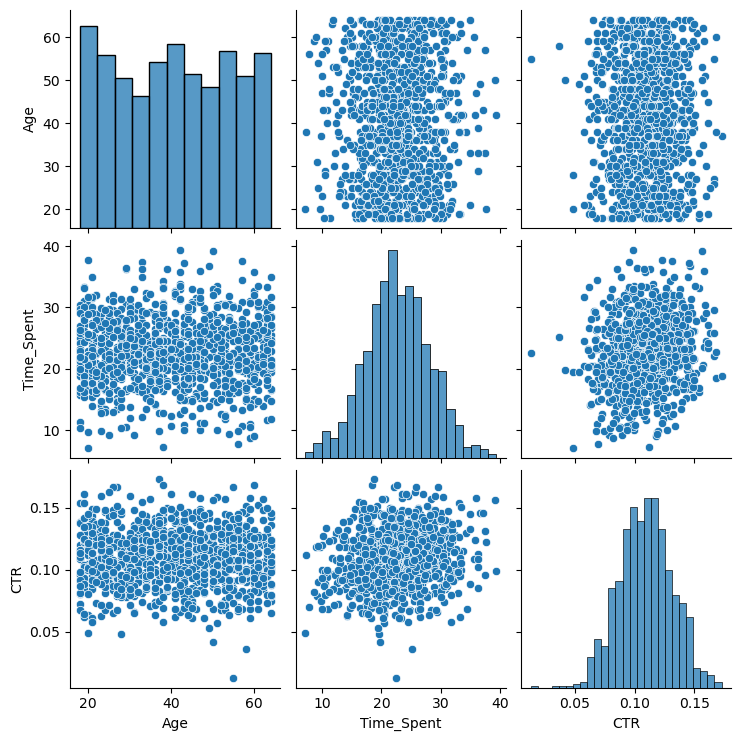

C:\Users\srika\AppData\Local\Temp\ipykernel_21064\4214363374.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


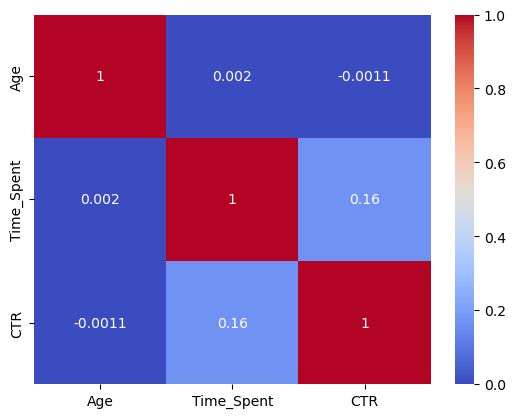

In [16]:
# identifying outlier using pair plot
sns.pairplot(df)
plt.show()

# checking if there is any corellation with age (i.e., numerical data)
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [17]:
# the data looks complete 
# staring the analysis to get information

***1. Analyze the results to determine which feature (if any) results in CTR or Time Spent lift.***

In [18]:
# we are finding the avarage of Time spent for each group:
df_time_avg = df.groupby('Variant')['Time_Spent'].mean()

df_time_lift = (df_time_avg - df_time_avg['Control']) / df_time_avg['Control'] * 100
# printing the values 
print("Time Spent Lift:",df_time_lift,"\n")

# we are finding the avarage of Time spent for each group:
df_CTR_avg = df.groupby('Variant')['CTR'].mean()

df_CTR_lift = (df_CTR_avg - df_CTR_avg['Control']) / df_CTR_avg['Control'] * 100
# printing the values 
print("Click through rate Lift:",df_CTR_lift,"\n")



Time Spent Lift: Variant
Control       0.000000
Variant A    23.590344
Variant B    16.307297
Name: Time_Spent, dtype: float64 

Click through rate Lift: Variant
Control       0.000000
Variant A    22.033917
Variant B    10.531151
Name: CTR, dtype: float64 




Time Spent Lift: Variant A(23.6%)> Variant B(16.3%) <br> 
Both have positive effect w.r.t Time Spent <br> 
CTR Lift: Variant A(22.03%)> Variant B(10.53%) <br> 
Both have positive effect w.r.t CTR <br>
***result : Variant A has larger lift*** <br>

***2. Conduct statistical testing to determine if there is a statistically significant difference between the features and the control group.***

In [19]:
# data set for each type of variant with respect to time spent
df_cont_t = df[df['Variant'] == 'Control']['Time_Spent']
df_var_a_time = df[df['Variant'] == 'Variant A']['Time_Spent']
df_var_b_time = df[df['Variant'] == 'Variant B']['Time_Spent']

t_stat_a, p_val_a = stats.ttest_ind(df_cont_t, df_var_a_time)
t_stat_b, p_val_b = stats.ttest_ind(df_cont_t, df_var_b_time)

print(" Time Spent - Variant A compared to Control:")
print("  t-statistic:", t_stat_a)
print("  p-value:", p_val_a,"\n")

print("Time Spent - Variant B compared to Control:")
print("  t-statistic:", t_stat_b)
print("  p-value:", p_val_b,"\n")


# data set for each type of variant with respect to CTR
df_cont_ctr = df[df['Variant'] == 'Control']['CTR']
df_var_a_ctr = df[df['Variant'] == 'Variant A']['CTR']
df_var_b_ctr = df[df['Variant'] == 'Variant B']['CTR']

t_stat_ac, p_val_ac = stats.ttest_ind(df_cont_ctr, df_var_a_ctr)
t_stat_bc, p_val_bc = stats.ttest_ind(df_cont_ctr, df_var_b_ctr)

print("CTR - Variant A compared to Control:")
print("  t-statistic:", t_stat_ac)
print("  p-value:", p_val_ac,"\n")

print("CTR - Variant B compared to Control:")
print("  t-statistic:", t_stat_bc)
print("  p-value:", p_val_bc,"\n")

 Time Spent - Variant A compared to Control:
  t-statistic: -12.142363487472364
  p-value: 8.488565644996449e-31 

Time Spent - Variant B compared to Control:
  t-statistic: -8.174237395991806
  p-value: 1.496358076285182e-15 

CTR - Variant A compared to Control:
  t-statistic: -13.829424737499187
  p-value: 1.9602781373243157e-38 

CTR - Variant B compared to Control:
  t-statistic: -6.4718143491783255
  p-value: 1.8743198199982106e-10 



Result: both variants have impact on user behavior w.r.t control group <br>
but P < 0.05 makes it very little significant

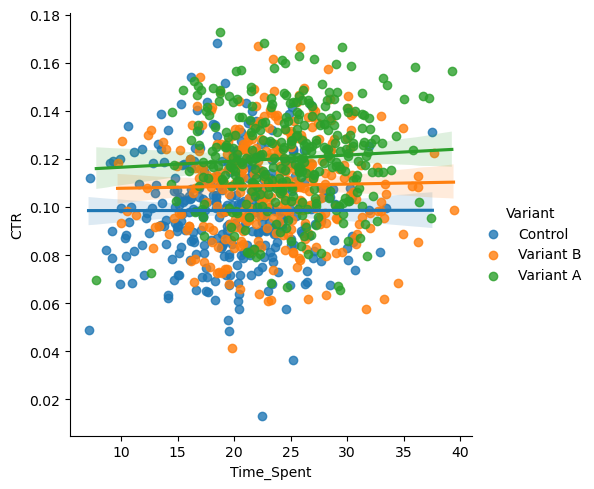

In [20]:
sns.lmplot(data = df, x='Time_Spent', y='CTR', hue = 'Variant')

as per the graph, Variant B it seems to closer to Control. but statistically Variant A points are much widely spread.

Hypothisis testing : Chi-Square <br>
creating a null hypothisis statement : <br>
***null hypothesis: There is no significant difference between the variants***

In [21]:
#considering 'time spent' and 'CTR' values for both variants
contingency = pd.crosstab(df['Variant'], [df['Time_Spent'], df['CTR']])
contingency_table = contingency.to_numpy()

chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p_val}")

Chi-squared: 1999.9999999999995
P-value: 0.4831801444710659


Result: both variants have impact on user behavior w.r.t control group <br>
& P > 0.05 . <br>
***Accepting the null Hypothesis***


Hypothisis testing : ANOVA <br>
creating a null hypothisis statement : <br>
***null hypothesis: both varients are different***

In [22]:
f_stat, p_val = stats.f_oneway(df_cont_t, df_var_a_time, df_var_b_time)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")


F-statistic: 75.60840947416146
P-value: 2.676826588910432e-31


p-value < 0.05 is in-significant <br>
reject the null hypothesis. <br>
that means no significance between variants w.r.t Time Spent <br>

In [23]:
f_stat, p_val = stats.f_oneway(df_cont_ctr, df_var_a_ctr, df_var_b_ctr)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

F-statistic: 93.588915936227
P-value: 5.638952705781955e-38


p-value < 0.05 is in-significant <br>
reject the null hypothesis. <br>
that means no significance between variants w.r.t CTR <br>

In summary, there is a significant difference in the 'time spent' & 'CTR' between the control group and the variants A and B. 
Need to check if any of data point can be removed / adjusted based on method of data collection.

***3. Summarize your results. Make a recommendation to the engineering team about which feature to deploy.***

consider time spent lift & CTR lift, variant A performS better.

Statistically both the varients have similar result in chi-Square & ANOVA 
both variants show very little significance but both improve in time spent and CTR compared to the control. 
Hence any feature can be applied.

Non-analytical methods can be used as the deciding factor like - issues in launching, development period & cost, refresh rate and compatibility with future product references.

***4. Create a roll-out plan. How quickly will you introduce the feature to your audience?***


Since the decision is difficult to make, we could plan for a further analysis or choose Variant A with best lift.

if further analysis is needed:
1) add detail of user feedback (collecting intentional user feedback)
2) variants compared to revenue generation
3) Risk of variant having issues
4) look for non-analytical methods to choose best fearture


if Variant A is chosen:
1) Need to make a timeline of deployment.
2) Run test for bugs.
3) Verify if there are further changes needed from all the other team to create a collective deployment.